# Analysis of kaggle dataset about student depression

In [ ]:
!pip install kaggle kagglehub

In [6]:
import kagglehub

path = kagglehub.dataset_download("ikynahidwin/depression-student-dataset")

print("Path to dataset files:", path)

100%|██████████| 4.25k/4.25k [00:00<00:00, 7.09MB/s]

Extracting files...
Path to dataset files: /home/crissyro/.cache/kagglehub/datasets/ikynahidwin/depression-student-dataset/versions/1


In [24]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 

plt.style.use('seaborn-v0_8-pastel')

In [2]:
PATH = 'data/depression_student.csv'
df = pd.read_csv(PATH, sep=',')

df.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No


In [3]:
df.shape

(502, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 502 non-null    object 
 1   Age                                    502 non-null    int64  
 2   Academic Pressure                      502 non-null    float64
 3   Study Satisfaction                     502 non-null    float64
 4   Sleep Duration                         502 non-null    object 
 5   Dietary Habits                         502 non-null    object 
 6   Have you ever had suicidal thoughts ?  502 non-null    object 
 7   Study Hours                            502 non-null    int64  
 8   Financial Stress                       502 non-null    int64  
 9   Family History of Mental Illness       502 non-null    object 
 10  Depression                             502 non-null    object 
dtypes: flo

In [5]:
df.describe()

,Age,Academic Pressure,Study Satisfaction,Study Hours,Financial Stress
count,502.000000,502.000000,502.000000,502.000000,502.000000
mean,26.241036,3.003984,3.075697,6.404382,2.928287
std,4.896501,1.390007,1.373490,3.742434,1.425053
min,18.000000,1.000000,1.000000,0.000000,1.000000
25%,22.000000,2.000000,2.000000,3.000000,2.000000
50%,26.500000,3.000000,3.000000,7.000000,3.000000
75%,30.000000,4.000000,4.000000,10.000000,4.000000
max,34.000000,5.000000,5.000000,12.000000,5.000000


In [6]:
df.describe(include='object')

,Gender,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Family History of Mental Illness,Depression
count,502,502,502,502,502,502
unique,2,4,3,2,2,2
top,Male,7-8 hours,Moderate,Yes,No,Yes
freq,267,128,172,260,265,252


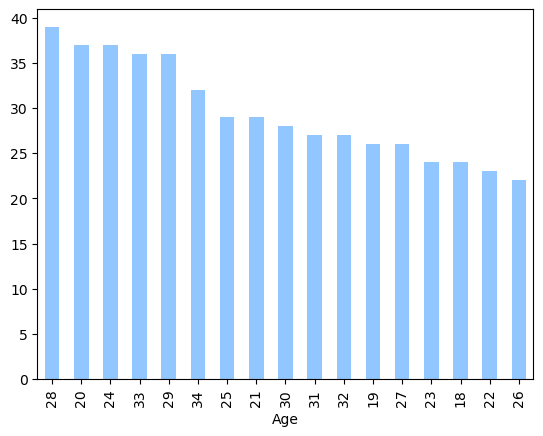

In [22]:
df.Age.value_counts().plot(kind='bar');

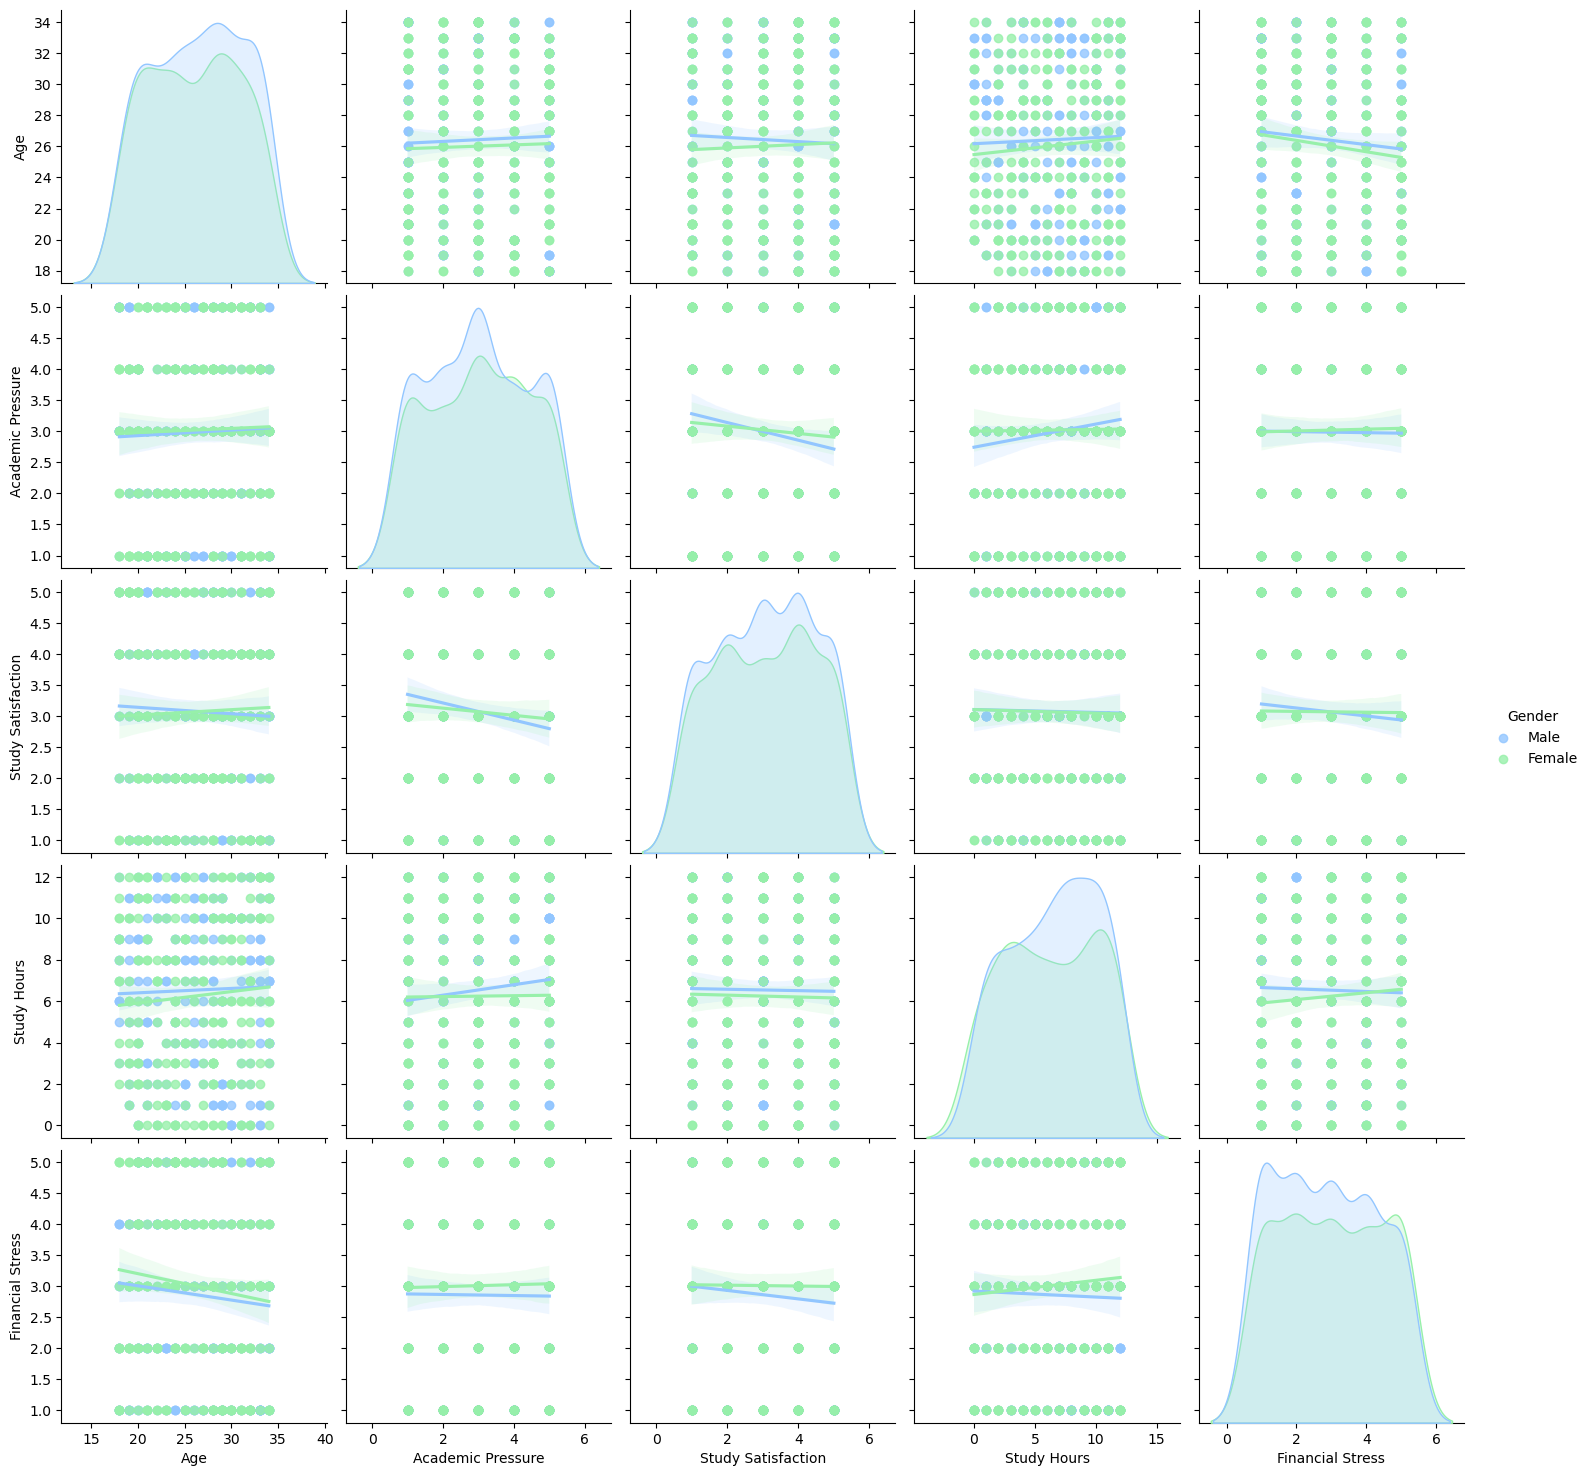

In [11]:
sns.pairplot(df, hue='Gender', height=3, diag_kind='kde', kind='reg');

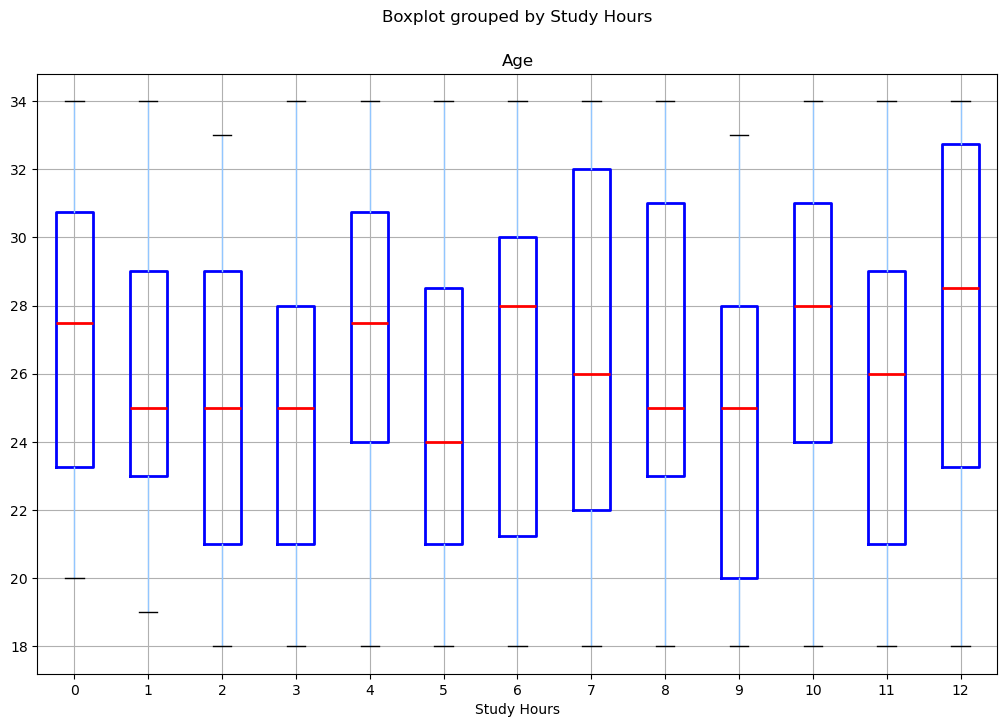

In [31]:
df.boxplot(column='Age', by='Study Hours', figsize=(12,8), boxprops={'linewidth': 2, 'color': 'blue'},
              medianprops={'linewidth': 2, 'color': 'red'});

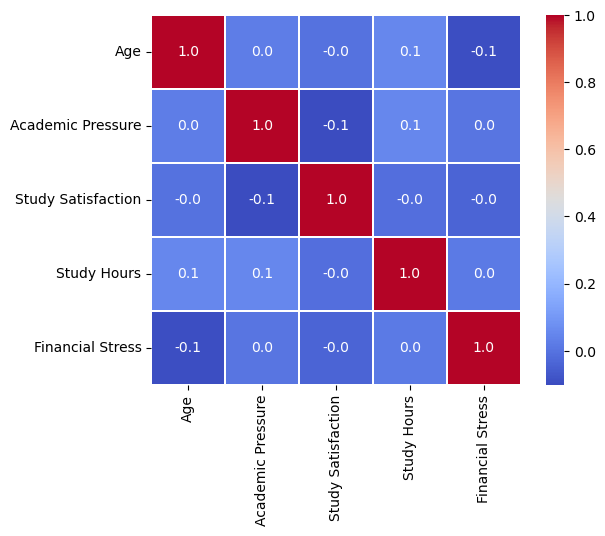

In [42]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, square=True,
            annot=True, fmt='.1f', linewidths=0.1, cmap='coolwarm');

In [45]:
object_dv = df.select_dtypes(include='object')
object_dv

,Gender,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Family History of Mental Illness,Depression
0,Male,7-8 hours,Moderate,Yes,Yes,No
1,Male,5-6 hours,Healthy,Yes,Yes,No
2,Male,5-6 hours,Unhealthy,Yes,No,Yes
3,Male,More than 8 hours,Unhealthy,Yes,Yes,No
4,Female,More than 8 hours,Healthy,Yes,Yes,No
...,...,...,...,...,...,...
497,Male,More than 8 hours,Unhealthy,No,No,Yes
498,Male,Less than 5 hours,Unhealthy,Yes,No,Yes
499,Female,5-6 hours,Healthy,No,Yes,No
500,Male,More than 8 hours,Healthy,No,Yes,No


In [46]:
df['Sleep Duration'].value_counts()

Sleep Duration
7-8 hours            128
More than 8 hours    128
5-6 hours            123
Less than 5 hours    123
Name: count, dtype: int64

In [47]:
df['Dietary Habits'].value_counts()

Dietary Habits
Moderate     172
Unhealthy    169
Healthy      161
Name: count, dtype: int64